## Data Cleaning & Data Preprocessing

### Handling of missing values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as scs

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# importing the dataset

df = pd.read_csv(r"C:\Users\HP\Desktop\PUSL2077-Practical Code\Datasets\employees.csv")

In [3]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [5]:
df.isnull().sum()    # measuring the count of missing values in the dataset

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [6]:
df['Gender'].mode()   #detecting the mode of qualitative variable

0    Female
Name: Gender, dtype: object

In [7]:
df['Gender'].fillna('Female',inplace=True)    # replacing gender with mode 'female'

In [8]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [9]:
df['Team'].mode()

0    Client Services
Name: Team, dtype: object

In [10]:
df['Team'].fillna('Other',inplace=True)

In [11]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                  0
dtype: int64

In [12]:
df['Senior Management'].fillna('Not Given',inplace=True)

In [13]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                  0
dtype: int64

In [14]:
#remove = ['First Name','Start Date']
df.drop(['First Name','Start Date'], axis=1)

,Gender,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Male,12:42 PM,97308,6.945,True,Marketing
1,Male,6:53 AM,61933,4.170,True,Other
2,Female,11:17 AM,130590,11.858,False,Finance
3,Male,1:00 PM,138705,9.340,True,Finance
4,Male,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...
995,Female,6:09 AM,132483,16.655,False,Distribution
996,Male,6:30 AM,42392,19.675,False,Finance
997,Male,12:39 PM,96914,1.421,False,Product
998,Male,4:45 PM,60500,11.985,False,Business Development


## Note on dropping off a variable in data cleaning process:
- remove = ['First Name']  #to drop one more variables we can create a list and pass it.
- df.drop(remove)

### Difference between iloc & loc.

- “loc” is used for selecting data by label, while “iloc” is used for selecting data by integer position
- df.loc[rows_to_select, cols_to_select]  - syntax mentioned as labels.
- df.iloc[0:5,2:4] - syntax mentioned as integers.

## Activity 01

In [15]:
df_2 = df.loc[df['Gender'] == 'Female']

In [16]:
df_2.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,Not Given,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


In [17]:
df_3 = df.loc[(df['Gender'] == 'Female') & (df['Salary'] > 100000)]

In [18]:
df_3.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development
11,Julie,Female,10/26/1997,3:19 PM,102508,12.637,True,Legal
18,Diana,Female,10/23/1981,10:27 AM,132940,19.082,False,Client Services
27,Scott,Female,7/11/1991,6:58 PM,122367,5.218,False,Legal


In [19]:
df_slice = df.iloc[900:920,0:2]    #getting a specific record from the dataset

In [20]:
df_slice

,First Name,Gender
900,Christina,Female
901,Patricia,Female
902,NaN,Male
903,Heather,Female
904,Stephanie,Female
905,Alice,Female
906,Frances,Female
907,Elizabeth,Female
908,Janice,Female
909,Donald,Male


In [21]:
df.dropna(axis = 0, how ='any')

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,Other
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,Female,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


### Checking for duplicates

In [22]:
df.duplicated().sum()

0

#### There is no any duplicates in the above dataset.

## Outlier Detection

- In statistics, an outlier is a data point that differs significantly from other observations.

### Checking for outliers using graphical method

In [23]:
import seaborn as sns

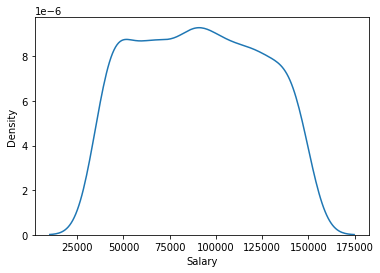

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['Salary'])
plt.show()

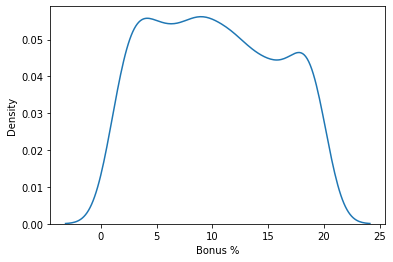

In [25]:
sns.kdeplot(df['Bonus %'])
plt.show()

#### There is no any outliers in the following dataset pertain to numerical variables

### Performing out IQR method outlier detection

Q1 = np.percentile(outlier_df['salary_in_usd'], 25)
Q3 = np.percentile(outlier_df['salary_in_usd'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = outlier_df[(outlier_df['salary_in_usd'] < lower_bound) | (outlier_df['salary_in_usd'] > upper_bound)]

### Perform the process using log transformation

log_data = np.log(outlier_df['salary_in_usd'])

plt.hist(log_data, label='Log-Transformed Data')
plt.legend()
plt.show()

### Based on the above chart we can derive that its inapproriate to conduct a log transformation to the above variable for the removal of outliers.

import scipy
from scipy import stats

z_scores = np.abs(stats.zscore(outlier_df['salary_in_usd']))    # taking the absolute values of Z-Scores

threshold = 3
outliers_finaldata = outlier_df[z_scores > threshold]

final_data = outlier_df[z_scores < threshold]

outliers_finaldata.head()

sns.kdeplot(final_data['salary_in_usd'])

## Log Transformation

In [35]:
# Generate 1000 samples from a right-skewed distribution
data = np.random.exponential(scale=2, size=1000)

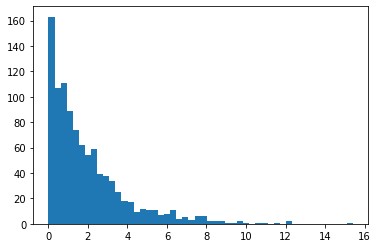

In [36]:
# Plot the data to visualize the skew
import matplotlib.pyplot as plt
plt.hist(data, bins=50)
plt.show()

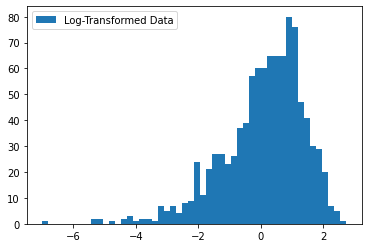

In [37]:
# Apply log transformation to the data
log_data = np.log(data)

# Plot the original data and the log-transformed data
plt.hist(log_data, bins=50, label='Log-Transformed Data')
plt.legend()
plt.show()

## Internally studentized residuals (AKA z-score method)

In [38]:
import scipy
from scipy import stats

z_scores = np.abs(stats.zscore(data))    # taking the absolute values of Z-Scores

threshold = 3

final_data = data[z_scores < threshold]   

<AxesSubplot:ylabel='Density'>

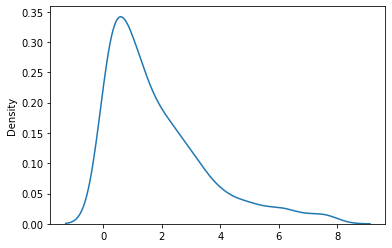

In [39]:
sns.kdeplot(final_data)